I would just like to analyze the data and find some insights.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['percent-bachelors-degrees-women-usa.csv']


In [2]:
df = pd.read_csv("../input/percent-bachelors-degrees-women-usa.csv")

In [3]:
df.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [5]:
df.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


I would like to compare the growth for every 5 years

In [31]:
def group_by_5_years(value):
    if value < 1976 :
        return "71-76"
    elif value < 1981:
        return "76-81"
    elif value < 1986:
        return "81-86"
    elif value < 1991:
        return "86-91"
    elif value < 1996:
        return "91-96"
    elif value < 2001:
        return "96-01"
    elif value < 2006:
        return "01-06"
    else:
        return "06-11"

In [7]:
df.Year = df.Year.apply(group_by_5_years)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


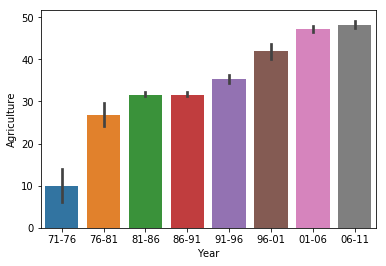

In [8]:
sns.barplot(x="Year",y="Agriculture",data = df)

In [10]:
group = df.groupby("Year").mean().reset_index()

In [24]:
def plotmatrix(start,end):
    fig, axs = plt.subplots(nrows = 2, ncols=2)
    i = 0
    cols = df.columns[start:end]
    fig.set_size_inches(14, 10)
    for indi in range(2):
        for indj in range(2):
                sns.barplot(x="Year",y=str(cols[i]),data = group,ax = axs[indi][indj],\
                            order = ['71-76', '76-81', '81-86', '86-91', '91-96','96-01','01-06','06-11'])
                i+=1
                #plt.xticks(rotation = 90)


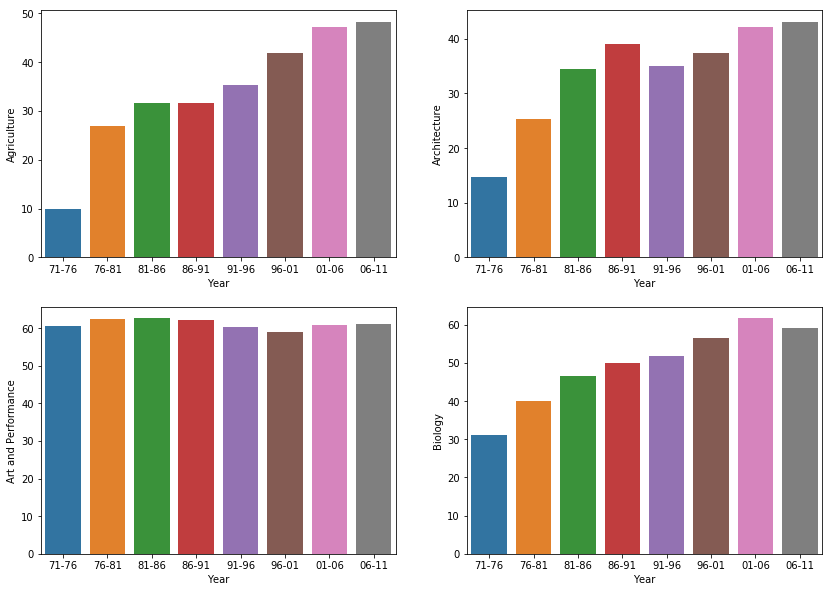

In [25]:
plotmatrix(1,5)

So from the above fig, it's clear that
1. Growth is in increasing order in Agriculture Field and even in Architecture Field
2. In Art and Performance, the growth is almost stagnant.
3. It's interesting to see that growth for Biology is declining from 2001-06 to 2006-11. 

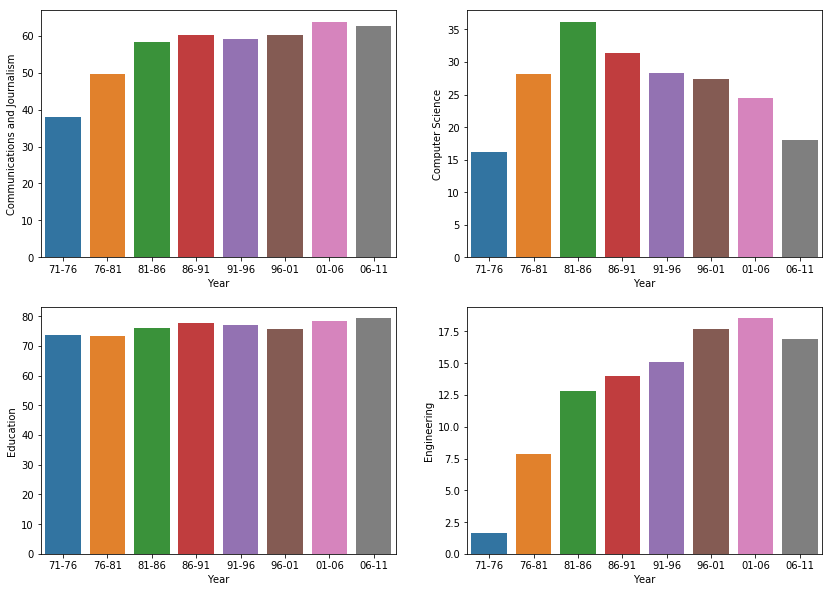

In [32]:
plotmatrix(6,10)

It's clearly understood that, women growth in Compute Science is declining

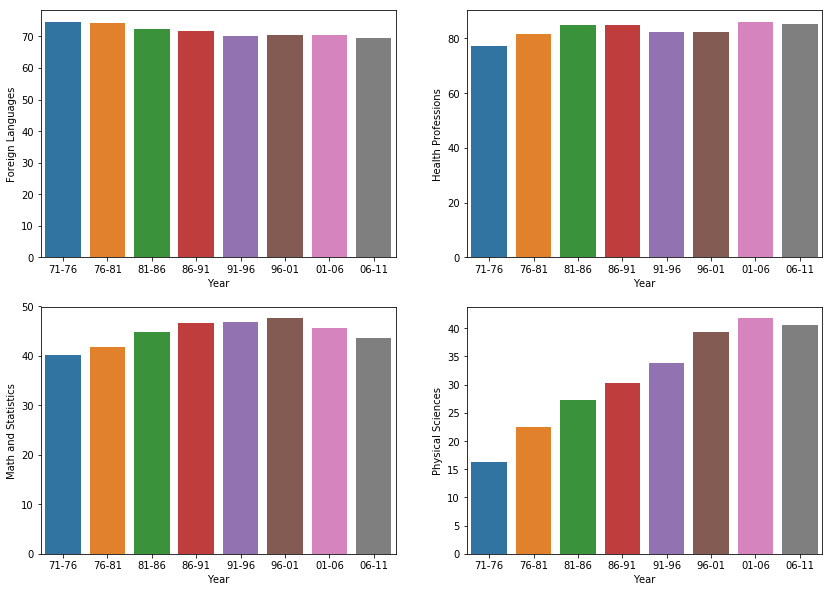

In [33]:
plotmatrix(11,15)

(under editing)